[< list of demos](Introduction.ipynb#demos)

<a id='top'></a>
# Barycentric Julian dates in TDB or TCB _(single star)_

This demo shows how to calculate barycentric times ([TCB](https://en.wikipedia.org/wiki/Barycentric_Coordinate_Time) and [TDB](https://en.wikipedia.org/wiki/Barycentric_Dynamical_Time)) for a list of UTC Julian dates, using τ Ceti as an example.

## Arguments:

`-p HD10700` - primary star: τ Ceti. PEXO retieves target information from Simbad and astrometry from Gaia/Hipparcos

`-i HARPS` - instrument: HARPS

`-t '2450000 2453000 10'` - epochs, JD from 2455000 to 2460000, every 10 days

`-m emulate` - PEXO mode

`-v 'JDutc BJDtdb BJDtcb` - output variables

`-o ../results/tdb-out.txt` - output file

## Run the code

Execute PEXO with the command below. This may take a few minutes to compute.

In [1]:
# cd into the code directory
%cd ../code

# run PEXO via the R script
! Rscript pexo.R -p HD10700 -i HARPS -t '2450000 2453000 10' -m emulate -v 'JDutc BJDtdb BJDtcb' -o ../results/tdb-out.txt

/home/timberhill/repositories/pexo/code
Warning message:
package ‘optparse’ was built under R version 3.6.3 
Loading required package: polynom
Warning messages:
1: package ‘orthopolynom’ was built under R version 3.6.3 
2: package ‘polynom’ was built under R version 3.6.3 

Attaching package: ‘pracma’

The following object is masked from ‘package:polynom’:

    integral

Warning message:
package ‘pracma’ was built under R version 3.6.3 
Warning message:
package ‘foreach’ was built under R version 3.6.3 
Loading required package: iterators
Loading required package: parallel
Warning messages:
1: package ‘doMC’ was built under R version 3.6.3 
2: package ‘iterators’ was built under R version 3.6.3 
Warning message:
package ‘MASS’ was built under R version 3.6.3 

Input Parameters:
mode = emulate 	ins = HARPS 	Niter = 1000 	Planet = 0 	geometry = TRUE 	ncore = 4 	component = TAR 	time = 2450000 2453000 10 	primary = HD10700 	mass = 1 	var = JDutc BJDtdb BJDtcb 	out = ../results/tdb-out.txt

## Output

The output file contains a table with 6 columns. Julian dates are divided into integer and decimal parts to preserve precision.

In [2]:
from utilities import Table
Table("../results/tdb-out.txt")

The plot below shows the BJD\[TDB\] as a function of UTC Julian date in units of days.

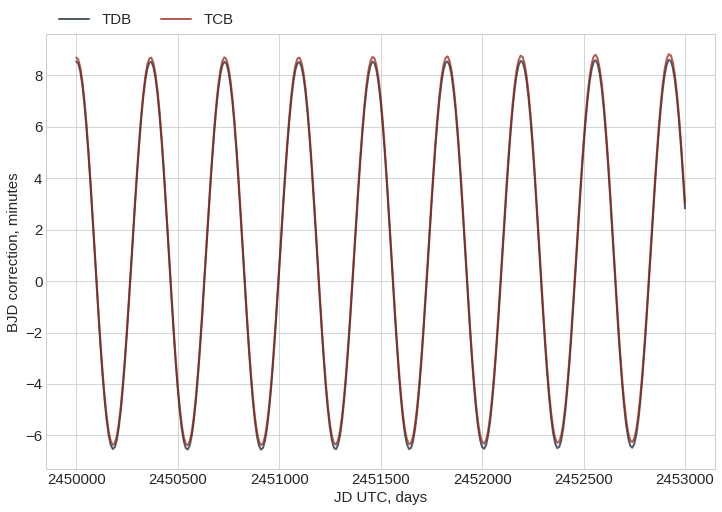

In [3]:
from utilities import Plot
p = Plot("../results/tdb-out.txt", factors=(1, 24*60)).add_plot(xcol=["JDutc1", "JDutc2"], ycol=["BJDtdb1", "BJDtdb2"], yxdiff=True, legend="TDB").add_plot(xcol=["JDutc1", "JDutc2"], ycol=["BJDtcb1", "BJDtcb2"], yxdiff=True, legend="TCB")
o=p.axis.set_xlabel("JD UTC, days")
o=p.axis.set_ylabel("BJD correction, minutes")